In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("default_of_credit_card_clients.csv")

In [25]:
df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [26]:
df = df.drop(labels = [0],axis = 0)

In [30]:
df = df.drop(columns='Unnamed: 0')

In [31]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
y = df["Y"]
X = df.drop(columns='Y')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
clf1 = DecisionTreeClassifier(random_state=42,max_depth=10)
clf2 = DecisionTreeClassifier(random_state=42,max_depth=100)
clf3 = DecisionTreeClassifier(random_state=42,max_depth=200)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=200, random_state=42)

In [40]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC max_depth=10 train data: ",roc_auc_score(y_train, clf1.predict_proba(X_train)[:, 1]))
print("ROC-AUC max_depth=10 test data: ",roc_auc_score(y_test, clf1.predict_proba(X_test)[:, 1]))
print("ROC-AUC max_depth=100 train data: ",roc_auc_score(y_train, clf2.predict_proba(X_train)[:, 1]))
print("ROC-AUC max_depth=100 test data: ",roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1]))
print("ROC-AUC max_depth=200 train data: ",roc_auc_score(y_train, clf3.predict_proba(X_train)[:, 1]))
print("ROC-AUC max_depth=200 test data: ",roc_auc_score(y_test, clf3.predict_proba(X_test)[:, 1]))

ROC-AUC max_depth=10 train data:  0.8257979056862035
ROC-AUC max_depth=10 test data:  0.7376578863512387
ROC-AUC max_depth=100 train data:  0.9999991047869146
ROC-AUC max_depth=100 test data:  0.6110862132478697
ROC-AUC max_depth=200 train data:  0.9999991047869146
ROC-AUC max_depth=200 test data:  0.6110862132478697


Мы видим что лучшая глубина дерева max_depth для модели лежит в районе от 10 до 100. Также видим что при увеличении глубины больше 100
Roc-auc для тестовой и обучающей выборке не меняется. Но у модели с глубиной 10 лучше Roc-Auc для тестовой выборки, чем у моделей с большей глубиной

In [42]:
for i in range(10,100,10):
    clf = DecisionTreeClassifier(random_state=42,max_depth=i)
    clf.fit(X_train, y_train)
    train_roc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("Max-Depth: ", i, "Train ROC-AUC: ", train_roc, "Test ROC-AUC: ",test_roc)

Max-Depth:  10 Train ROC-AUC:  0.8257979056862035 Test ROC-AUC:  0.7376578863512387
Max-Depth:  20 Train ROC-AUC:  0.9669409928140442 Test ROC-AUC:  0.5981323460996539
Max-Depth:  30 Train ROC-AUC:  0.9991803167467078 Test ROC-AUC:  0.604393933017237
Max-Depth:  40 Train ROC-AUC:  0.9999906757019081 Test ROC-AUC:  0.6122412285540975
Max-Depth:  50 Train ROC-AUC:  0.9999991047869146 Test ROC-AUC:  0.6110862132478697
Max-Depth:  60 Train ROC-AUC:  0.9999991047869146 Test ROC-AUC:  0.6110862132478697
Max-Depth:  70 Train ROC-AUC:  0.9999991047869146 Test ROC-AUC:  0.6110862132478697
Max-Depth:  80 Train ROC-AUC:  0.9999991047869146 Test ROC-AUC:  0.6110862132478697
Max-Depth:  90 Train ROC-AUC:  0.9999991047869146 Test ROC-AUC:  0.6110862132478697


In [43]:
for i in range(1,10):
    clf = DecisionTreeClassifier(random_state=42,max_depth=i)
    clf.fit(X_train, y_train)
    train_roc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("Max-Depth: ", i, "Train ROC-AUC: ", train_roc, "Test ROC-AUC: ",test_roc)

Max-Depth:  1 Train ROC-AUC:  0.6447734125656595 Test ROC-AUC:  0.6390153055777588
Max-Depth:  2 Train ROC-AUC:  0.6947954302812023 Test ROC-AUC:  0.6873443601437822
Max-Depth:  3 Train ROC-AUC:  0.7353000655185334 Test ROC-AUC:  0.7263155645462299
Max-Depth:  4 Train ROC-AUC:  0.7491956082938214 Test ROC-AUC:  0.7403011944528716
Max-Depth:  5 Train ROC-AUC:  0.7639115937447378 Test ROC-AUC:  0.7523530511952248
Max-Depth:  6 Train ROC-AUC:  0.7735393187796564 Test ROC-AUC:  0.7554452520632411
Max-Depth:  7 Train ROC-AUC:  0.7830329378768086 Test ROC-AUC:  0.7515843680345452
Max-Depth:  8 Train ROC-AUC:  0.7962541991151655 Test ROC-AUC:  0.7502762010786101
Max-Depth:  9 Train ROC-AUC:  0.8090875413888945 Test ROC-AUC:  0.7445463794381276


Из этих тестов можно сделать вывод что модель с глубиной 6 показывает наилучший результат для тестовой выборки

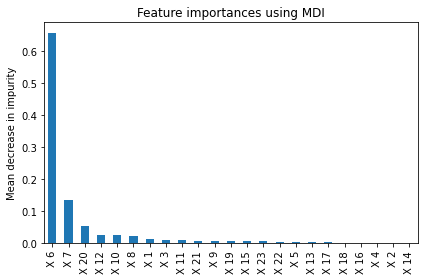

In [50]:
feature_names = [f"X {i+1}" for i in range(X.shape[1])]
main_clf = DecisionTreeClassifier(random_state=42,max_depth=6)
main_clf.fit(X_train, y_train)
importances = main_clf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Из данного графика видно распределение признаков по важности признаков для модели. Наиболее важный признак является X6-X7 - это означает что для модели важным признаком для скоринга является история прошлых платежей, и то на сколько заемщик отсрочил свой первый платеж апрель-август.
### Также стоит заметить, что пол никак не влияет на платежеспособность заемщика.

In [51]:
from sklearn import tree

In [55]:
tree.export_graphviz(main_clf, 
                out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [65]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] Не удается найти указанный файл

Визуализация дерева

In [67]:
from IPython.display import Image
Image(url= "tree.png", )